In [1]:
%matplotlib inline
import numpy as np
import kwant
import mpld3
from matplotlib import pyplot as plt

In [20]:
def make_system(t=1.0, dis=0.3, E0=complex(0,-0.00029)*0.001, E0L=0., salt='abc', W=200, L=500, return_lead=False):
    # Makes a 2d wire with a disordered segment.
    lat = kwant.lattice.square(1)
    sys = kwant.Builder()
    
    #### Define the scattering region. ####
    onsite = lambda site: E0 + dis * (2 * kwant.digest.uniform(repr(site), salt) - 1)
    rectangle = lambda pos: 0 <= pos[0] < L and 0 <= pos[1] < W
    sys[lat.shape(rectangle, (0, 0))] = onsite
    sys[lat.neighbors()] = t


    #### Define and attach the leads. ####
    # Construct the left lead.
    lead = kwant.Builder(kwant.TranslationalSymmetry((-1, 0)))
    lead[(lat(0, j) for j in xrange(W))] = E0L
    lead[lat.neighbors()] = t

    # Attach the left lead and its reversed copy.
    sys.attach_lead(lead)
    sys.attach_lead(lead.reversed())
    
    if return_lead:
        return lead
    else:
        return sys

In [3]:
N = 60
ts = []
rs = []
for n in xrange(N):
    print n,
    fsys = make_system(W=375, salt = str(n)).finalized()
    s = kwant.smatrix(fsys, energy = 0.38, check_hermiticity=False)
    ts += list(np.linalg.svd(s.submatrix(1,0), compute_uv=False))
    rs += list(np.linalg.svd(s.submatrix(0,0), compute_uv=False))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59


In [4]:
t_eigs = np.array(ts)**2
r_eigs = np.array(rs)**2

## Results for W=375

In [5]:
# saved output
np.savez("t_r_coefficients_W=375", ts = t_eigs, rs = r_eigs)

In [18]:
# To load saved output:
# a = np.load("t_r_coefficients.npz")
# a.files

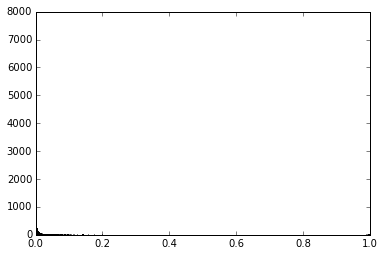

In [17]:
hist_t = plt.hist(t_eigs, bins=1500)

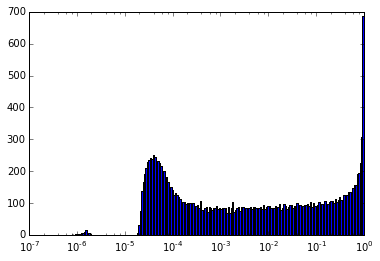

In [18]:
hist_r = plt.hist(1-r_eigs, bins=np.logspace(-6.1, 0., 200))
plt.xscale('log')

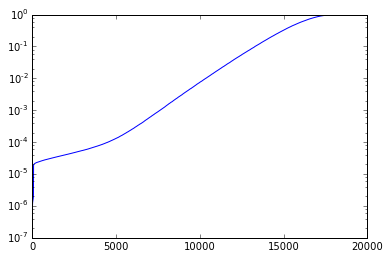

In [19]:
#plt.plot(ts, '.')
mpld3.enable_notebook()
plt.plot(1-np.sort(r_eigs)[::-1])
plt.yscale('log')

In [22]:
lead = make_system(W=375, return_lead=True)
lead = lead.finalized()

In [45]:
bands = kwant.physics.Bands(lead)
momenta = np.linspace(-0.2, 0.2, 201)
energies = [bands(k) for k in momenta]

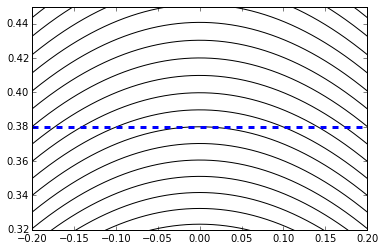

In [52]:
mpld3.disable_notebook()
plt.plot(momenta, energies, c='k')
plt.ylim([0.32,0.45])
plt.xlim([-0.2,0.2])
plt.axhline(0.38, ls ='--', linewidth=3)
plt.show()

## Results for W=200

Histogram of transmission eigenvalues

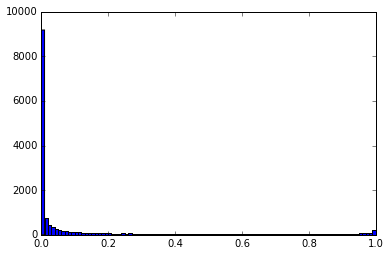

In [6]:
hist_t = plt.hist(t_eigs, bins=100)

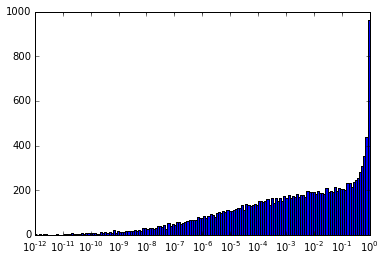

In [7]:
plt.hist(t_eigs, bins=np.logspace(-12., 0., 160))
plt.xscale('log')

Histogram of 1-r

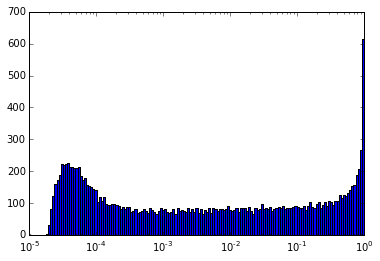

In [8]:
hist_r = plt.hist(1-r_eigs, bins=np.logspace(-5, 0., 160))
plt.xscale('log')

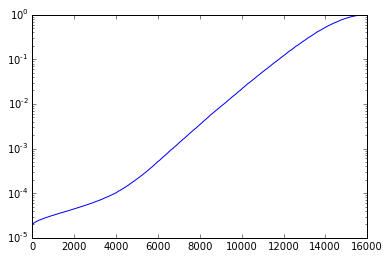

In [9]:
#plt.plot(ts, '.')
plt.plot(1-np.sort(r_eigs)[::-1])
plt.yscale('log')